# ベイズ線形回帰の実装

## やること

1. 観測データセットの作成 \
今回はsin波にガウスノイズを付加したデータセットを15プロット作成 \
$y_n = \mathrm{sin}(x_n) + \sigma_n^2 $ \
$\sigma_n^2 = \mathcal{N}(0,\sigma_n^2) $ \
つまり，  
$y_n = \mathcal{N}(\mathrm{sin}(x_n),\sigma^2) $ \
を基に観測データセットを作成する \
それを多項式： \
$\hat{\mu}={\bf w}_0^{\mathrm{T}} \cdot {\bf \hat{x_n}}^{3} + {\bf w}_1^{\mathrm{T}} \cdot {\bf \hat{x_n}}^{2} + {\bf w}_2^{\mathrm{T}} \cdot \hat{{\bf x_n}} + {\bf w}_3^{\mathrm{T}} \cdot 1$ \
$\hat{y_n} = \mathcal{N}(\hat{y_n}|\hat{\mu},\hat{\sigma^2}) $ \
で近似する
1. メインプログラム作成の流れ
    1. 観測データセットの作成
    1. 重み分布の更新プログラム
    1. 予測分布プログラム
    1. 結果を可視化するプログラム
    1. それらを呼び出すプログラム  

In [80]:
import numpy as np
import matplotlib.pyplot as plt

## A. 観測データセットの作成 + 学習データセットの作成

In [176]:
# 観測データセット
mu  = 0
std = 1
sampling = 15

np.random.seed(2)
x = np.random.normal(mu, std, sampling)
# 正規分布
y = lambda x, mu, std: (np.exp( (-(x - mu)**2) / (2*(std**2)) ) / (np.sqrt(2*np.pi)*std)) + 0.1*np.random.randn(len(x))

In [177]:
# 学習データセット
def update_x_hat(x, term_num):
    x_hat = np.zeros([term_num, len(x)])
    for i in range(term_num):
        for j, x_raw in enumerate(x):
            x_hat[i,j] = x_raw**(term_num-(i+1)) 
    return x_hat

def set_x_hat(new_x_hat):
    x_hat = new_x_hat
    
def get_x_hat():
    return self.x_hat

array([-0.41675785, -0.05626683, -2.1361961 ,  1.64027081, -1.79343559,
       -0.84174737,  0.50288142, -1.24528809, -1.05795222, -0.90900761,
        0.55145404,  2.29220801,  0.04153939, -1.11792545,  0.53905832])

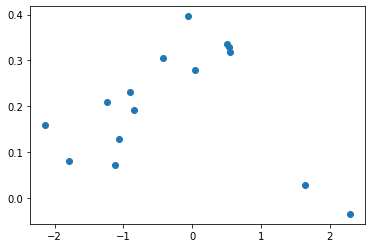

In [178]:
plt.scatter(x,y(x, mu, std))

## B. 重み分布の更新プログラム

In [250]:
self.weight_mean = np.zeros(4)
self.weight_cov = np.ones([4,4])

def get_weight_mean():
    return weight_mean

def _set_weight_mean(new_weight_mean):
    weight_mean = new_weight_mean

def get_weight_cov():
    return cov
    
def _set_weight_cov(new_weight_cov):
    weight_cov = new_weight_cov

def _calc_weight_mean(n):
    return update_weight_cov(n) * (((y[n]@get_x_hat()[n].T)/get_y_sigma()) + (1/get_weight_cov())@get_weight_mean())
    
def _calc_weight_cov(n):
    return (np.dot(get_x_hat()[n], get_x_hat()[n].T) / get_y_sigma()) + (1/get_weight_cov())

def update_weight_params(n):
    new_weight_mean = _calc_weight_mean(n)
    new_weight_cov = _calc_weight_cov(n)
    _set_weight_mean(new_weight_mean)
    _set_weight_cov(new_weight_cov)

## C. 予測分布プログラム

In [ ]:
def set_y_hat_mean(new_y_hat_mean):
    y_hat_mean = new_y_hat_mean

def update_y_hat_mean():
    set_y_hat_mean(get_weight_mean@get_x_hat())[0]
    
def get_y_hat_mean():
    return y_hat_mean

def set_y_hat_sigma(new_y_hat_sigma):
    y_hat_sigma = new_y_hat_sigma
    
def updata_y_hat_sigma():
    set_y_hat_sigma(get_y_hat_sigma() + (get_x_hat().T@get_weight_cov()@get_x_hat()))
    
def get_y_hat_sigma():
    return y_hat_sigma

## D. 結果を可視化するプログラム

## E. それらを呼び出すプログラム

In [222]:



def set_weight(new_weight):
    weight = new_weight

def get_weight():
    return weight
    

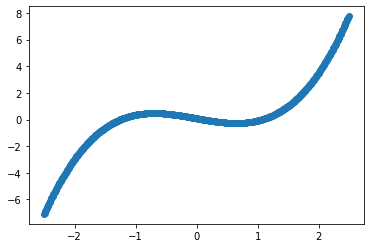

In [247]:
mean = np.zeros(4)
cov = np.ones([4,4])

# 初期の重みは標準正規分布
weight = get_weight(mu, sigma)

# xの範囲(連続値に近似させる)
x_range = np.arange(-2.5, 2.5, 0.01)

# xを多項式に拡張
x_hat = get_x_hat(x_range, len(mu))

# 近似式(多項式)の期待値を取得
updata_chi(weight, x_hat)
chi = get_chi()

# 近似式をプロットする
plt.scatter(x_range, chi)